# BEATS commissioning: test of HESEB undulator gap
______________________________________________________

Author:         Gianluca Iori
Created on:   09/06/2023
______________________________________________________


In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
# import scipy as sc
# import h5py
# from scipy.constants import c, h

In [12]:
matplotlib.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')

In [3]:
%matplotlib inline

## Plot BEATS XBPM readings during the HESEB undulator gap test

#### Read `camonitor` output

In [13]:
camonitor_output = pd.read_csv('XBPM_monitor_undulator_test.txt', sep=',', names=['channel', 'time', 'current'], skiprows=[0])

In [14]:
camonitor_output.head()

,channel,time,current
0,BEATS-AH501:getCalculatedCurrent.G,2023-06-05 11:45:27.580048,0.000005
1,BEATS-AH501:getCalculatedCurrent.F,2023-06-05 11:45:28.114803,0.000009
2,BEATS-AH501:getCalculatedCurrent.G,2023-06-05 11:45:28.147922,0.000005
3,BEATS-AH501:getCalculatedCurrent.F,2023-06-05 11:45:29.115125,0.000009
4,BEATS-AH501:getCalculatedCurrent.G,2023-06-05 11:45:29.147838,0.000005


### Create 2 dataframes with the TOP and BOTTOM XBPM channel readings

In [15]:
channelG = camonitor_output.loc[camonitor_output['channel'] == 'BEATS-AH501:getCalculatedCurrent.G']

In [16]:
channelF = camonitor_output.loc[camonitor_output['channel'] == 'BEATS-AH501:getCalculatedCurrent.F']

### Format time info to `datetime` type

In [17]:
channelG['time']

0        2023-06-05 11:45:27.580048
2        2023-06-05 11:45:28.147922
4        2023-06-05 11:45:29.147838
6        2023-06-05 11:45:30.148467
8        2023-06-05 11:45:31.147924
                    ...            
18526    2023-06-05 14:20:21.148185
18528    2023-06-05 14:20:22.147775
18530    2023-06-05 14:20:23.147713
18532    2023-06-05 14:20:24.147771
18534    2023-06-05 14:20:25.147710
Name: time, Length: 9275, dtype: object

In [23]:
datetime.strptime(channelG['time'][0], '%Y-%m-%d %H:%M:%S.%f')

datetime.datetime(2023, 6, 5, 11, 45, 27, 580048)

In [36]:
channelG['time'] = pd.to_datetime(channelG['time'], format='%Y-%m-%d %H:%M:%S.%f')

/tmp/ipykernel_23652/895859390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channelG['time'] = pd.to_datetime(channelG['time'], format='%Y-%m-%d %H:%M:%S.%f')


In [38]:
channelF['time'] = pd.to_datetime(channelF['time'], format='%Y-%m-%d %H:%M:%S.%f')

/tmp/ipykernel_23652/4077335232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channelF['time'] = pd.to_datetime(channelF['time'], format='%Y-%m-%d %H:%M:%S.%f')


### Select specific time range

In [92]:
channelG_test = channelG.set_index('time').between_time('12:15', '13:50').reset_index()

In [93]:
channelF_test = channelF.set_index('time').between_time('12:15', '13:50').reset_index()

### Convolve current readings (running mean)

In [96]:
kernelsize = 25

In [84]:
# np.convolve(channelG_test['current'], np.ones(kernelsize)/kernelsize, mode='valid')

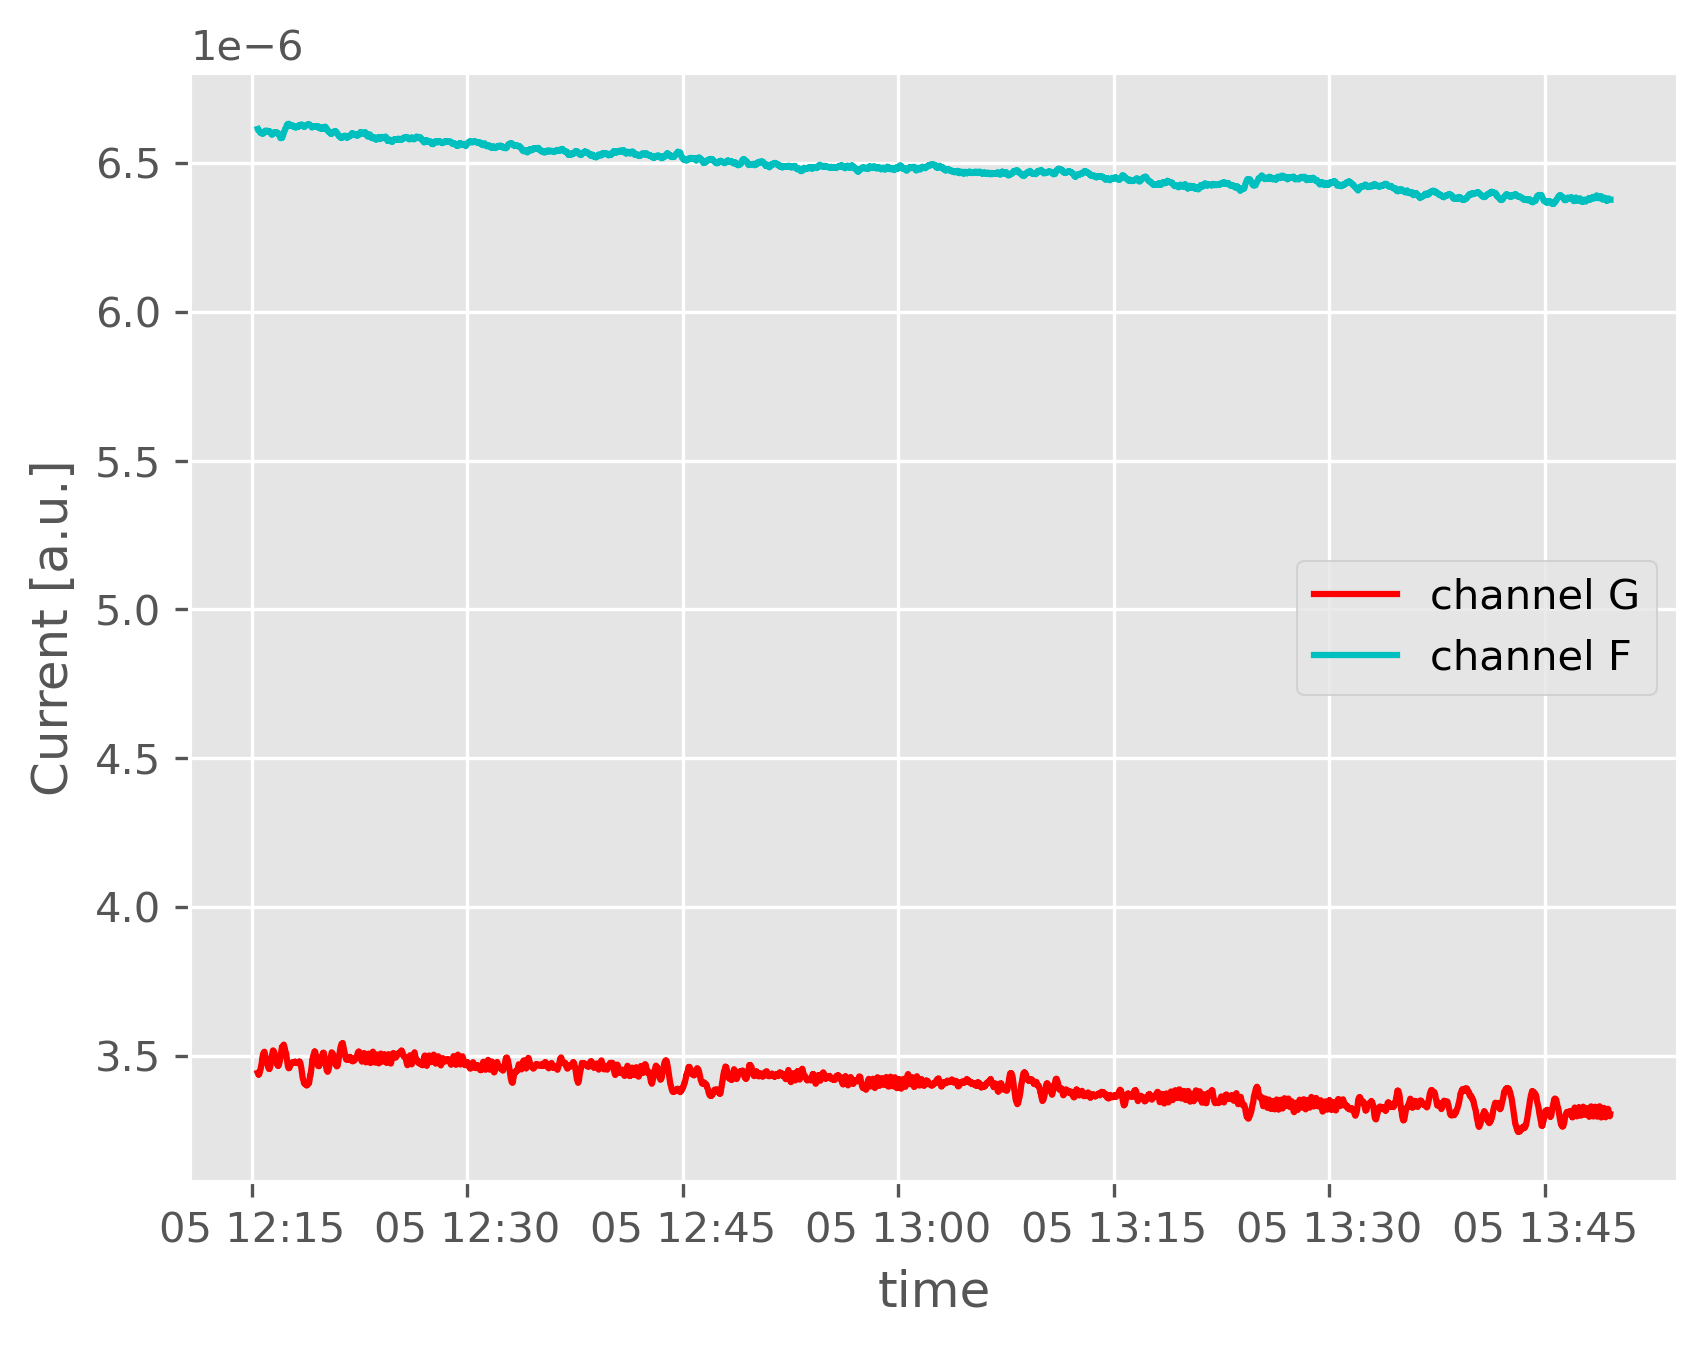

In [99]:
plt.plot(channelG_test['time'][kernelsize:-kernelsize], np.convolve(channelG_test['current'], np.ones(kernelsize)/kernelsize, mode='same')[kernelsize:-kernelsize], 'r',
         channelF_test['time'][kernelsize:-kernelsize], np.convolve(channelF_test['current'], np.ones(kernelsize)/kernelsize, mode='same')[kernelsize:-kernelsize], 'c')

plt.xlabel('time')
plt.ylabel('Current [a.u.]')
plt.grid(True, which="both")

plt.legend(['channel G', 'channel F'])

#### Beam size @ sample

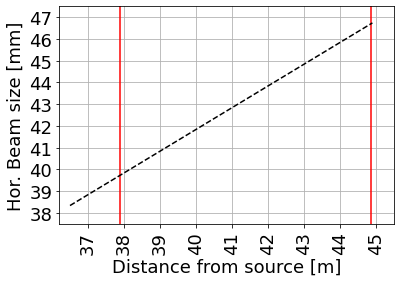

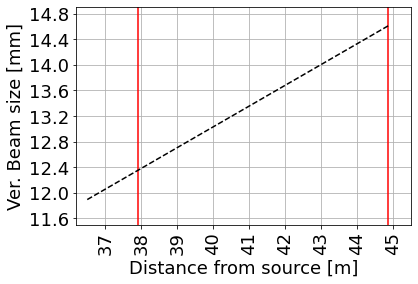

In [68]:
# HORIZONTAL
SDD = np.arange(36.5, 44.965, 0.2) # Sample Detector Distance [m] entrance of exp. hutch to beam stop
d_window2 = 37.900 # [m] Window 2
d_bs = 44.865 # [m] Beam Stop
f, ax = plt.subplots()
plt.plot([d_window2, d_window2], [20, 48], 'r')
plt.plot([d_bs, d_bs], [20, 48], 'r')
plt.plot(SDD, 1e3*(ss_x+(np.sin(eta_x*1e-3)*SDD)), '--k')
plt.xlabel('Distance from source [m]')
plt.ylabel('Hor. Beam size [mm]')
plt.xticks(np.arange(31, 46, 1))
plt.xticks(rotation=90)
plt.yticks(np.arange(33, 55, 1))
ax.set(xlim=(36.2, 45.5), ylim=(37.5, 47.5))
plt.grid(True, which="both")
# plt.legend(['Window 2 pos', 'Hor. beam width'], loc='upper center')
f.savefig("Hor_beam_size.png", bbox_inches='tight', dpi=600)

# VERTICAL
f, ax = plt.subplots()
plt.plot([d_window2, d_window2], [10, 18], 'r')
plt.plot([d_bs, d_bs], [10, 18], 'r')
plt.plot(SDD, 1e3*(ss_y+(np.sin(eta_y*1e-3)*SDD)), '--k')
plt.xlabel('Distance from source [m]')
plt.ylabel('Ver. Beam size [mm]')
plt.xticks(np.arange(31, 46, 1))
plt.xticks(rotation=90)
plt.yticks(np.arange(10, 16, 0.4))
ax.set(xlim=(36.2, 45.5), ylim=(11.5, 14.9))

plt.grid(True, which="both")
f.savefig("Ver_beam_size.png", bbox_inches='tight', dpi=600)